<a href="https://colab.research.google.com/github/dayaiit/Machine-Learning/blob/main/W3_L3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

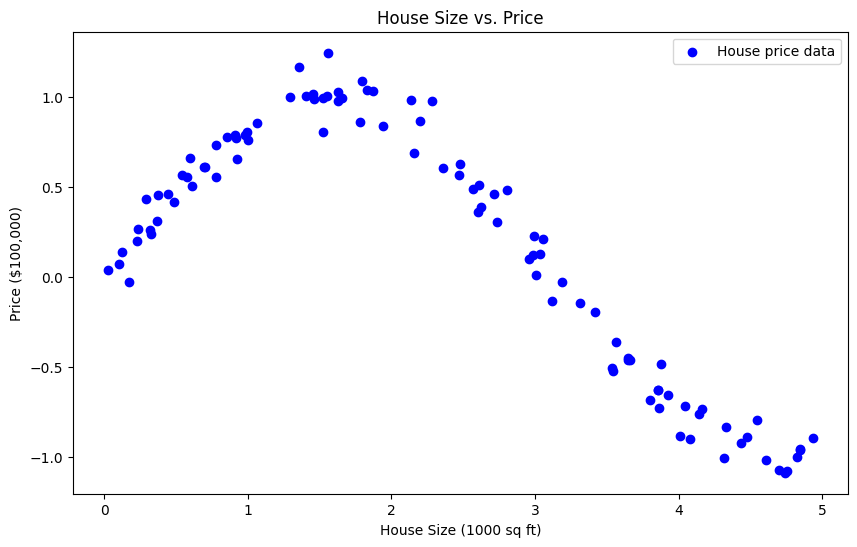

Training set size: 60
Cross-validation set size: 20
Test set size: 20
Degree 1: Training Error = 0.1670, CV Error = 0.2221
Degree 2: Training Error = 0.0570, CV Error = 0.0670
Degree 3: Training Error = 0.0122, CV Error = 0.0108
Degree 4: Training Error = 0.0095, CV Error = 0.0081
Degree 5: Training Error = 0.0087, CV Error = 0.0086
Degree 6: Training Error = 0.0087, CV Error = 0.0089
Degree 7: Training Error = 0.0081, CV Error = 0.0101
Degree 8: Training Error = 0.0080, CV Error = 0.0103
Degree 9: Training Error = 0.0080, CV Error = 0.0104
Degree 10: Training Error = 0.0079, CV Error = 0.0095


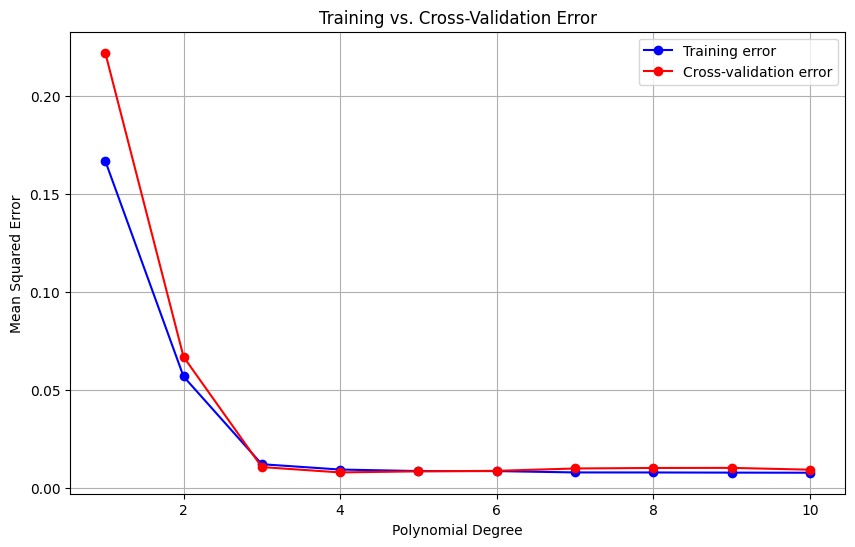

Best polynomial degree: 4
Test error with degree 4 polynomial: 0.0083


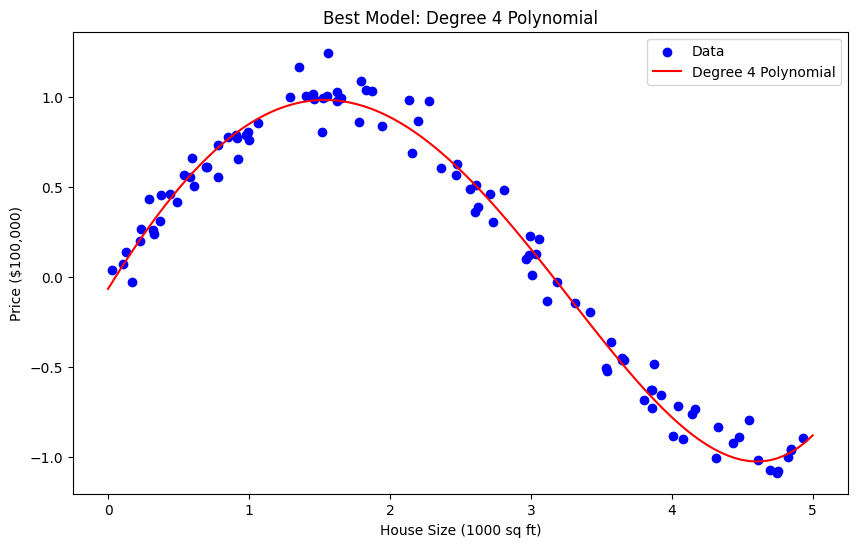

In [1]:
# Model Selection with Cross-Validation
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create some sample data (house size vs. price)
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)  # House sizes (100 samples)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # House prices with some noise

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='House price data')
plt.title('House Size vs. Price')
plt.xlabel('House Size (1000 sq ft)')
plt.ylabel('Price ($100,000)')
plt.legend()
plt.show()

# Split data into training, cross-validation, and test sets
# First, split into train+cv and test
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Then split train+cv into train and cv
X_train, X_cv, y_train, y_cv = train_test_split(X_train_cv, y_train_cv, test_size=0.25, random_state=42)
# Now we have: 60% train, 20% cv, 20% test

print(f"Training set size: {X_train.shape[0]}")
print(f"Cross-validation set size: {X_cv.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Try different polynomial degrees
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_errors = []
cv_errors = []

# For each degree, fit a model and calculate errors
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_cv_poly = poly.transform(X_cv)

    # Fit the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Calculate errors
    train_pred = model.predict(X_train_poly)
    cv_pred = model.predict(X_cv_poly)

    train_error = mean_squared_error(y_train, train_pred)
    cv_error = mean_squared_error(y_cv, cv_pred)

    train_errors.append(train_error)
    cv_errors.append(cv_error)

    print(f"Degree {degree}: Training Error = {train_error:.4f}, CV Error = {cv_error:.4f}")

# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, 'o-', color='blue', label='Training error')
plt.plot(degrees, cv_errors, 'o-', color='red', label='Cross-validation error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Training vs. Cross-Validation Error')
plt.legend()
plt.grid(True)
plt.show()

# Find the best degree
best_degree = degrees[np.argmin(cv_errors)]
print(f"Best polynomial degree: {best_degree}")

# Train the final model with the best degree
best_poly = PolynomialFeatures(degree=best_degree)
X_train_best = best_poly.fit_transform(X_train)
X_cv_best = best_poly.transform(X_cv)
X_test_best = best_poly.transform(X_test)

final_model = LinearRegression()
final_model.fit(X_train_best, y_train)

# Evaluate on test set
test_pred = final_model.predict(X_test_best)
test_error = mean_squared_error(y_test, test_pred)
print(f"Test error with degree {best_degree} polynomial: {test_error:.4f}")

# Plot the best model
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')

# Generate points for smooth curve
X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
X_plot_poly = best_poly.transform(X_plot)
y_plot = final_model.predict(X_plot_poly)

plt.plot(X_plot, y_plot, color='red', label=f'Degree {best_degree} Polynomial')
plt.title(f'Best Model: Degree {best_degree} Polynomial')
plt.xlabel('House Size (1000 sq ft)')
plt.ylabel('Price ($100,000)')
plt.legend()
plt.show()

# Try it yourself: Create a function to run this process on your own data
def select_best_polynomial(X, y, max_degree=10):
    """
    Select the best polynomial degree using cross-validation.

    Parameters:
    X: Features array
    y: Target array
    max_degree: Maximum polynomial degree to try

    Returns:
    best_degree: The best polynomial degree
    final_model: The trained model with the best degree
    """
    # Your implementation here!
    # Hint: Follow the steps in the main code
    pass